## New Car Data

#### Data from December 2016, provided by [Cooper Union via Kaggle](https://www.kaggle.com/CooperUnion/cardataset), originally scraped from [Edmunds](https://www.edmunds.com) and [Twitter](https://www.twitter.com)

### Exploratory Data Analysis

In [1]:
# Basic library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import original dataset
cars = pd.read_csv('./data/kaggledata.csv')

In [3]:
# Inspect first few rows
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# The naming is a little too verbose for my liking
cars.rename(columns={'Make':'make','Model':'model','Year':'year','Engine Fuel Type':'fuel',
                     'Engine HP':'hp','Engine Cylinders':'num_cylinders','Transmission Type':'transmission',
                     'Driven_Wheels':'driven_wheels','Number of Doors':'num_doors','Market Category':'category',
                     'Vehicle Size':'size','Vehicle Style':'style','highway MPG':'mpg_highway',
                     'city mpg':'mpg_city','Popularity':'popularity','MSRP':'msrp'},inplace=True)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
make             11914 non-null object
model            11914 non-null object
year             11914 non-null int64
fuel             11911 non-null object
hp               11845 non-null float64
num_cylinders    11884 non-null float64
transmission     11914 non-null object
driven_wheels    11914 non-null object
num_doors        11908 non-null float64
category         8172 non-null object
size             11914 non-null object
style            11914 non-null object
mpg_highway      11914 non-null int64
mpg_city         11914 non-null int64
popularity       11914 non-null int64
msrp             11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


It's largely a clean data set except for a couple categories. The key caveat is that only the last three years of production of a car model is included in this dataset. 

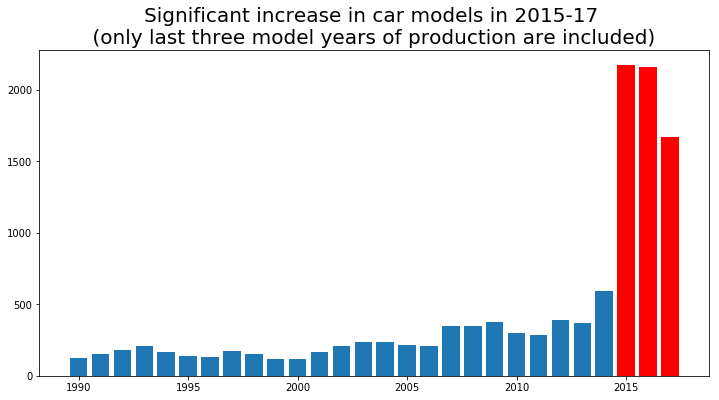

In [6]:
# Plot number for cars by model year
plt.figure(figsize=(12,6))
plt.bar(x=cars['year'].value_counts().index, height=cars['year'].value_counts())
plt.bar(x=cars['year'].value_counts(ascending=True).index[-3:], 
        height=cars['year'].value_counts(ascending=True)[-3:],color='r')
plt.title("Significant increase in car models in 2015-17 \n (only last three model years of production are included) ", 
          size=20);

In [7]:
cars.columns # for reference

Index(['make', 'model', 'year', 'fuel', 'hp', 'num_cylinders', 'transmission',
       'driven_wheels', 'num_doors', 'category', 'size', 'style',
       'mpg_highway', 'mpg_city', 'popularity', 'msrp'],
      dtype='object')

In [8]:
# Manufacturer details
print(f"There are {cars['make'].value_counts().shape[0]} manufacturers.")
print()
print(f"Here are the top 10 manufacturers by number of models:\n{cars['make'].value_counts()[:10]}")

There are 48 manufacturers.

Here are the top 10 manufacturers by number of models:
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Nissan         558
GMC            515
Honda          449
Mazda          423
Cadillac       397
Name: make, dtype: int64


In [9]:
# Model details
print(f"There are {cars['model'].value_counts().shape[0]} models.")
print()
print(f"Here are the models with the most variations/configurations:\n{cars['model'].value_counts()[:10]}")

There are 915 models.

Here are the models with the most variations/configurations:
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Tacoma                 80
Frontier               76
GTI                    76
Accord                 75
Beetle                 75
Name: model, dtype: int64


In [10]:
# Fuel Type
cars['fuel'].value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: fuel, dtype: int64

In [11]:
# What were those natuaral gas cars?
cars[(cars['fuel']=='natural gas') | (cars['fuel']=='flex-fuel (unleaded/natural gas)')]

,make,model,year,fuel,hp,num_cylinders,transmission,driven_wheels,num_doors,category,size,style,mpg_highway,mpg_city,popularity,msrp
2556,Honda,Civic,2015,natural gas,110.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,38,27,2202,26740
2565,Honda,Civic,2015,natural gas,110.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,38,27,2202,29390
5825,Chevrolet,Impala,2015,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,"Flex Fuel,Performance",Large,Sedan,25,17,1385,40660
5830,Chevrolet,Impala,2015,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,"Flex Fuel,Performance",Large,Sedan,25,17,1385,37535
5831,Chevrolet,Impala,2016,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,"Flex Fuel,Performance",Large,Sedan,25,17,1385,40810
5833,Chevrolet,Impala,2016,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,"Flex Fuel,Performance",Large,Sedan,25,17,1385,37570
5839,Chevrolet,Impala,2017,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,"Flex Fuel,Performance",Large,Sedan,25,17,1385,37675
5840,Chevrolet,Impala,2017,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,"Flex Fuel,Performance",Large,Sedan,25,17,1385,40915


Honda made a version of the Civic that ran on Compressed Natural Gas, the [Honda Civic GX](https://en.wikipedia.org/wiki/Honda_Civic_GX). The 2015 model was its last year of production. Chevy also has a [bifuel version of their popular Impala](https://www.automobilemag.com/news/897849/).

In [12]:
# The recommended vs. required premium unleaded fuel types seem equivalent so I'll combine them
premium_mask = (cars['fuel']=='premium unleaded (required)') | (cars['fuel']=='premium unleaded (recommended)')
flex_mask = (cars['fuel']=='flex-fuel (unleaded/E85)') | (cars['fuel']=='flex-fuel (premium unleaded required/E85)') | (cars['fuel']=='flex-fuel (premium unleaded recommended/E85)')
cars.loc[premium_mask,'fuel'] = 'premium unleaded'
cars.loc[flex_mask,'fuel'] = 'flex-fuel (unleaded/E85)'
cars['fuel'].value_counts()

regular unleaded                    7172
premium unleaded                    3532
flex-fuel (unleaded/E85)             979
diesel                               154
electric                              66
flex-fuel (unleaded/natural gas)       6
natural gas                            2
Name: fuel, dtype: int64

In [13]:
# As shown before a few NaNs here ... probably can fill in these blanks with some googling
cars[cars.hp.isna()]

,make,model,year,fuel,hp,num_cylinders,transmission,driven_wheels,num_doors,category,size,style,mpg_highway,mpg_city,popularity,msrp
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded,NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
2907,Lincoln,Continental,2017,premium unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,53915
2908,Lincoln,Continental,2017,premium unleaded,NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,64915
4203,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,30,23,5657,29100
4204,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28,22,5657,30850
4205,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28,22,5657,26850


In [14]:
# Fill in missing horsepowers

In [15]:
cars.num_cylinders.value_counts()

4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: num_cylinders, dtype: int64

/Users/willkarnasiewicz/anaconda3/envs/dsi/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/willkarnasiewicz/anaconda3/envs/dsi/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


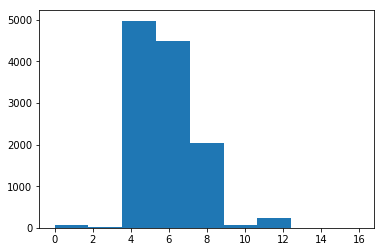

In [16]:
plt.hist(cars['num_cylinders'], bins=9);

In [17]:
# 16 cylinder! Can that be right? 
cars[cars.num_cylinders==16]

,make,model,year,fuel,hp,num_cylinders,transmission,driven_wheels,num_doors,category,size,style,mpg_highway,mpg_city,popularity,msrp
11362,Bugatti,Veyron 16.4,2008,premium unleaded,1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902
11363,Bugatti,Veyron 16.4,2008,premium unleaded,1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000
11364,Bugatti,Veyron 16.4,2009,premium unleaded,1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1705769


Looks like some (or all) of these are wrong. e.g. BMW Z4 has a turbocharged 4 cylinder engine and the Audi 100, which would later become the Audi A6, has a 6 cylinder engine.

In [18]:
# fix wrong num_cylinders

In [19]:
cars.transmission.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission, dtype: int64

In [20]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
make             11914 non-null object
model            11914 non-null object
year             11914 non-null int64
fuel             11911 non-null object
hp               11845 non-null float64
num_cylinders    11884 non-null float64
transmission     11914 non-null object
driven_wheels    11914 non-null object
num_doors        11908 non-null float64
category         8172 non-null object
size             11914 non-null object
style            11914 non-null object
mpg_highway      11914 non-null int64
mpg_city         11914 non-null int64
popularity       11914 non-null int64
msrp             11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


### Let's narrow it down to just 2015-2017 model years

In [21]:
current_cars = cars[cars['year'].isin([2015,2016,2017])]
current_cars['year'].value_counts()

2015    2170
2016    2157
2017    1668
Name: year, dtype: int64

In [22]:
current_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995 entries, 32 to 11902
Data columns (total 16 columns):
make             5995 non-null object
model            5995 non-null object
year             5995 non-null int64
fuel             5995 non-null object
hp               5944 non-null float64
num_cylinders    5987 non-null float64
transmission     5995 non-null object
driven_wheels    5995 non-null object
num_doors        5990 non-null float64
category         4671 non-null object
size             5995 non-null object
style            5995 non-null object
mpg_highway      5995 non-null int64
mpg_city         5995 non-null int64
popularity       5995 non-null int64
msrp             5995 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 796.2+ KB


In [23]:
# Let's inspect the nulls
current_cars[current_cars['num_doors'].isna()]

,make,model,year,fuel,hp,num_cylinders,transmission,driven_wheels,num_doors,category,size,style,mpg_highway,mpg_city,popularity,msrp
6930,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


In [24]:
current_cars.loc[(current_cars['num_doors'].isna()),'num_doors'] = 4.0

/Users/willkarnasiewicz/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
null_hp = current_cars['hp'].isna()
fiat_null = (current_cars['make'] == 'FIAT') & (null_hp)
continental_null = (current_cars['model'] == 'Continental') & (null_hp)
escape_null = (current_cars['model'] == 'Escape') & (null_hp)
focus_null = (current_cars['model'] == 'Focus') & (null_hp)
impala_null = (current_cars['model'] == 'Impala') & (null_hp)
leaf_null = (current_cars['model'] == 'Leaf') & (null_hp)
benz_null = (current_cars['make'] == 'Mercedes-Benz') & (null_hp)
mkz_null = (current_cars['model'] == 'MKZ') & (null_hp)
tesla_null = (current_cars['make'] == 'Tesla') & (null_hp)
kia_null = (current_cars['make'] == 'Kia') & (null_hp)

current_cars.loc[fiat_null,'hp'] = 111
current_cars.loc[continental_null,'hp'] = 335
current_cars.loc[escape_null,'hp'] = 179
current_cars.loc[focus_null,'hp'] = 143
current_cars.loc[impala_null,'hp'] = 230
current_cars.loc[leaf_null,'hp'] = 107
current_cars.loc[benz_null,'hp'] = 200
current_cars.loc[mkz_null,'hp'] = 188
current_cars.loc[tesla_null,'hp'] = 382
current_cars.loc[kia_null,'hp'] = 109

In [26]:
current_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995 entries, 32 to 11902
Data columns (total 16 columns):
make             5995 non-null object
model            5995 non-null object
year             5995 non-null int64
fuel             5995 non-null object
hp               5995 non-null float64
num_cylinders    5987 non-null float64
transmission     5995 non-null object
driven_wheels    5995 non-null object
num_doors        5995 non-null float64
category         4671 non-null object
size             5995 non-null object
style            5995 non-null object
mpg_highway      5995 non-null int64
mpg_city         5995 non-null int64
popularity       5995 non-null int64
msrp             5995 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 796.2+ KB


About 22% nulls in the category column; not sure exactly how much I'll want to use this category so will hold off on doing something with the nulls for now.

In [27]:
# Save to file
current_cars.to_csv('./data/car_data_2015-17.csv',index=False)